In [125]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Preprocessing and Analysis of the Data

Preprocess data and analyse outliers

In [126]:
df_nonstop_flights = pd.read_csv('data/nonstop_flights.csv')
df_nonstop_flights.head()

,legId,searchDate,flightDate,startingAirport,destinationAirport,fareBasisCode,travelDuration,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,totalFare,seatsRemaining,totalTravelDistance,segmentsDepartureTimeRaw,segmentsAirlineName,segmentsAirlineCode
0,98809246c317a10f05364bf51dac112f,2022-07-23,2022-07-24,ATL,BOS,QA0QA0MQ,PT2H35M,0,False,False,True,450.23,498.6,9,947.0,2022-07-24T10:25:00.000-04:00,Delta,DL
1,63fb3a2b20760eb06e3b7f6aeeaa5bbc,2022-07-23,2022-07-24,ATL,BOS,QA0QA0MQ,PT2H35M,0,False,False,True,450.23,498.6,9,947.0,2022-07-24T11:40:00.000-04:00,Delta,DL
2,979dbb67c54f766208406162a8e273e5,2022-07-23,2022-07-24,ATL,BOS,QA0QA0MQ,PT2H35M,0,False,False,True,450.23,498.6,9,947.0,2022-07-24T13:45:00.000-04:00,Delta,DL
3,7cfcb0c9d1df0771fa9efbd254e90de7,2022-07-23,2022-07-24,ATL,BOS,QA0QA0MQ,PT2H37M,0,False,False,True,450.23,498.6,7,947.0,2022-07-24T08:15:00.000-04:00,Delta,DL
4,bc2fe799cc05da1d5e49cf9f9596e09a,2022-07-23,2022-07-24,ATL,BOS,QA0QA0MQ,PT2H38M,0,False,False,True,450.23,498.6,9,947.0,2022-07-24T12:57:00.000-04:00,Delta,DL


**Duplicate Check**

Duplicate rows can lead to data leakage, as the same entry may appear in both the training and test datasets, resulting in overly optimistic model performance. Therefore, it is essential to check for and remove any duplicate rows from the dataset before proceeding.

In [127]:
df_nonstop_flights.duplicated().sum()

np.int64(0)

No duplicate rows were found.

Get Missing Value Amount

In [128]:
print(df_nonstop_flights.isnull().sum())

legId                          0
searchDate                     0
flightDate                     0
startingAirport                0
destinationAirport             0
fareBasisCode                  0
travelDuration                 0
elapsedDays                    0
isBasicEconomy                 0
isRefundable                   0
isNonStop                      0
baseFare                       0
totalFare                      0
seatsRemaining                 0
totalTravelDistance         5317
segmentsDepartureTimeRaw       0
segmentsAirlineName            0
segmentsAirlineCode            0
dtype: int64


In [129]:
df_missing_values = df_nonstop_flights[df_nonstop_flights.isnull().any(axis=1)]

df_missing_values.head()

,legId,searchDate,flightDate,startingAirport,destinationAirport,fareBasisCode,travelDuration,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,totalFare,seatsRemaining,totalTravelDistance,segmentsDepartureTimeRaw,segmentsAirlineName,segmentsAirlineCode
44,448179ad6dad5a76d3f05282adc61194,2022-07-23,2022-07-24,ATL,DFW,MNR,PT2H22M,0,False,False,True,176.0,232.59,0,NaN,2022-07-24T08:00:00.000-04:00,Spirit Airlines,NK
60,9167721876f25e1ec32d97b4d5b71fee,2022-07-23,2022-07-24,ATL,DTW,MNR,PT1H57M,0,False,False,True,144.0,200.59,0,NaN,2022-07-24T07:25:00.000-04:00,Spirit Airlines,NK
61,93651c14c819af64ee50f3f532b38d42,2022-07-23,2022-07-24,ATL,DTW,MNR,PT2H,0,False,False,True,144.0,200.59,0,NaN,2022-07-24T15:04:00.000-04:00,Spirit Airlines,NK
62,6aad32f524c9834b6e9b275a9240b83d,2022-07-23,2022-07-24,ATL,DTW,HNR,PT2H,0,False,False,True,174.0,230.59,0,NaN,2022-07-24T17:37:00.000-04:00,Spirit Airlines,NK
72,98cc77576679d8f9eed57467908c35b4,2022-07-23,2022-07-24,ATL,EWR,KNR,PT2H12M,0,False,False,True,119.0,175.59,0,NaN,2022-07-24T06:20:00.000-04:00,Spirit Airlines,NK


In [130]:
df_nonstop_flights['fareBasisCode'].value_counts()

fareBasisCode
V7AWZNN1    3751
NVAHZNN1    1704
MVAHZNN1    1191
NUAIZNN1    1177
NVAHZNN3    1115
            ... 
E21EXS2        1
V07SXS2        1
HAUTX0MC       1
U07EXS2        1
LAA7AHBS       1
Name: count, Length: 2006, dtype: int64

**Initial Feature Cleanup**
Removing the 'legId' and 'fareBasisCode' columns.

**Reasons:**
* `legId`: This is a unique identifier for each flight leg and holds no predictive value for a model.
* `fareBasisCode`: As shown by the `value_counts()` analysis in Cell 3, this column has extremely high cardinality (over 2000 unique values). Without deep domain knowledge or complex feature engineering, it is unsuitable for modeling.

In [131]:
df_nonstop_flights = df_nonstop_flights.drop(columns=['legId', 'fareBasisCode'])
df_nonstop_flights.head()

,searchDate,flightDate,startingAirport,destinationAirport,travelDuration,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,totalFare,seatsRemaining,totalTravelDistance,segmentsDepartureTimeRaw,segmentsAirlineName,segmentsAirlineCode
0,2022-07-23,2022-07-24,ATL,BOS,PT2H35M,0,False,False,True,450.23,498.6,9,947.0,2022-07-24T10:25:00.000-04:00,Delta,DL
1,2022-07-23,2022-07-24,ATL,BOS,PT2H35M,0,False,False,True,450.23,498.6,9,947.0,2022-07-24T11:40:00.000-04:00,Delta,DL
2,2022-07-23,2022-07-24,ATL,BOS,PT2H35M,0,False,False,True,450.23,498.6,9,947.0,2022-07-24T13:45:00.000-04:00,Delta,DL
3,2022-07-23,2022-07-24,ATL,BOS,PT2H37M,0,False,False,True,450.23,498.6,7,947.0,2022-07-24T08:15:00.000-04:00,Delta,DL
4,2022-07-23,2022-07-24,ATL,BOS,PT2H38M,0,False,False,True,450.23,498.6,9,947.0,2022-07-24T12:57:00.000-04:00,Delta,DL


**Feature Engineering: Booking Lead Time & Day of Week**

Converted the `searchDate` and `flightDate` columns from object/string types to datetime objects to enable time-based calculations.

**New Features:** 
- **`Booking Lead Time`**: The number of days between the search date and the flight date. This captures advance booking patterns (e.g., last-minute vs. early bookings).
- **`dayOfWeek`**: The day of week when the flight departs (Monday-Sunday). This captures weekly pricing patterns, as business travelers often fly on weekdays while leisure travelers prefer weekends.

The original date columns (`searchDate` and `flightDate`) are dropped after feature extraction, as their information is now encoded in the new features.

In [132]:
df_nonstop_flights['searchDate'] = pd.to_datetime(df_nonstop_flights['searchDate'])
df_nonstop_flights['flightDate'] = pd.to_datetime(df_nonstop_flights['flightDate'])

df_nonstop_flights['Booking Lead Time'] = (df_nonstop_flights['flightDate'] - df_nonstop_flights['searchDate']).dt.days

day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df_nonstop_flights['dayOfWeek'] = df_nonstop_flights['flightDate'].dt.dayofweek.map(day_names)

df_nonstop_flights = df_nonstop_flights.drop(columns=['searchDate', 'flightDate'])

df_nonstop_flights.head()

,startingAirport,destinationAirport,travelDuration,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,totalFare,seatsRemaining,totalTravelDistance,segmentsDepartureTimeRaw,segmentsAirlineName,segmentsAirlineCode,Booking Lead Time,dayOfWeek
0,ATL,BOS,PT2H35M,0,False,False,True,450.23,498.6,9,947.0,2022-07-24T10:25:00.000-04:00,Delta,DL,1,Sunday
1,ATL,BOS,PT2H35M,0,False,False,True,450.23,498.6,9,947.0,2022-07-24T11:40:00.000-04:00,Delta,DL,1,Sunday
2,ATL,BOS,PT2H35M,0,False,False,True,450.23,498.6,9,947.0,2022-07-24T13:45:00.000-04:00,Delta,DL,1,Sunday
3,ATL,BOS,PT2H37M,0,False,False,True,450.23,498.6,7,947.0,2022-07-24T08:15:00.000-04:00,Delta,DL,1,Sunday
4,ATL,BOS,PT2H38M,0,False,False,True,450.23,498.6,9,947.0,2022-07-24T12:57:00.000-04:00,Delta,DL,1,Sunday


Booking Lead Time - edge cases

are there negative lead times? Where flightDate is before searchDate

In [133]:
print((df_nonstop_flights['Booking Lead Time'] < 0).sum())

0


**Feature Engineering: Departure Time**

Extract the local departure time from `segmentsDepartureTimeRaw` and convert it to minutes since midnight. Then apply cyclical encoding using sine and cosine transformations to preserve the circular nature of time (e.g., 23:59 is close to 00:01).

**Process:**
1. Parse the ISO datetime string and extract hours and minutes
2. Convert to total minutes since midnight 
3. Apply cyclical encoding: `sin(2π * minutes / 1440)` and `cos(2π * minutes / 1440)`

**Rationale:** Cyclical encoding ensures the model understands that time is circular (midnight wraps around to the next day), which is important for capturing time-of-day pricing patterns (e.g., early morning vs. evening flights).

In [134]:
def extract_time_minutes(datetime_str):
    try:
        time_part = str(datetime_str).split('T')[1] 
        hour_minute = time_part.split(':')[:2]
        hours = int(hour_minute[0])
        minutes = int(hour_minute[1])
        return hours * 60 + minutes
    except:
        return None

df_nonstop_flights['departureTimeMinutes'] = df_nonstop_flights['segmentsDepartureTimeRaw'].apply(extract_time_minutes)


df_nonstop_flights['departureTime_sin'] = np.sin(2 * np.pi * df_nonstop_flights['departureTimeMinutes'] / 1440)
df_nonstop_flights['departureTime_cos'] = np.cos(2 * np.pi * df_nonstop_flights['departureTimeMinutes'] / 1440)

df_nonstop_flights = df_nonstop_flights.drop(columns=['segmentsDepartureTimeRaw', 'departureTimeMinutes'])

df_nonstop_flights.head()

,startingAirport,destinationAirport,travelDuration,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,totalFare,seatsRemaining,totalTravelDistance,segmentsAirlineName,segmentsAirlineCode,Booking Lead Time,dayOfWeek,departureTime_sin,departureTime_cos
0,ATL,BOS,PT2H35M,0,False,False,True,450.23,498.6,9,947.0,Delta,DL,1,Sunday,0.402747,-0.915311
1,ATL,BOS,PT2H35M,0,False,False,True,450.23,498.6,9,947.0,Delta,DL,1,Sunday,0.087156,-0.996195
2,ATL,BOS,PT2H35M,0,False,False,True,450.23,498.6,9,947.0,Delta,DL,1,Sunday,-0.442289,-0.896873
3,ATL,BOS,PT2H37M,0,False,False,True,450.23,498.6,7,947.0,Delta,DL,1,Sunday,0.831470,-0.555570
4,ATL,BOS,PT2H38M,0,False,False,True,450.23,498.6,9,947.0,Delta,DL,1,Sunday,-0.246153,-0.969231


In [135]:
df_nonstop_flights

,startingAirport,destinationAirport,travelDuration,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,totalFare,seatsRemaining,totalTravelDistance,segmentsAirlineName,segmentsAirlineCode,Booking Lead Time,dayOfWeek,departureTime_sin,departureTime_cos
0,ATL,BOS,PT2H35M,0,False,False,True,450.23,498.6,9,947.0,Delta,DL,1,Sunday,0.402747,-0.915311
1,ATL,BOS,PT2H35M,0,False,False,True,450.23,498.6,9,947.0,Delta,DL,1,Sunday,0.087156,-0.996195
2,ATL,BOS,PT2H35M,0,False,False,True,450.23,498.6,9,947.0,Delta,DL,1,Sunday,-0.442289,-0.896873
3,ATL,BOS,PT2H37M,0,False,False,True,450.23,498.6,7,947.0,Delta,DL,1,Sunday,0.831470,-0.555570
4,ATL,BOS,PT2H38M,0,False,False,True,450.23,498.6,9,947.0,Delta,DL,1,Sunday,-0.246153,-0.969231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157081,SFO,ORD,PT4H20M,0,False,False,True,322.79,361.6,2,1847.0,United,UA,60,Wednesday,0.300706,-0.953717
157082,SFO,PHL,PT5H19M,1,False,False,True,231.63,263.6,7,2516.0,American Airlines,AA,60,Wednesday,-0.346117,0.938191
157083,SFO,PHL,PT5H20M,0,False,False,True,231.63,263.6,7,2516.0,American Airlines,AA,60,Wednesday,-0.233445,-0.972370
157084,SFO,PHL,PT5H21M,0,False,False,True,231.63,263.6,7,2516.0,American Airlines,AA,60,Wednesday,0.999990,-0.004363


**Feature Engineering: Flight Duration**
The `travelDuration` column is in a non-numeric ISO 8601 string format (e.g., "PT2H35M").

**New Feature:** Converted these strings into a single numerical column, 'travelDuration_minutes', representing the total duration in minutes. This is essential for using the duration in correlations and models.

The original 'travelDuration' string column is then dropped.

In [136]:
timedelta_objects = pd.to_timedelta(
    df_nonstop_flights['travelDuration'], 
    errors='coerce'
)
df_nonstop_flights['travelDuration_minutes'] = timedelta_objects.dt.total_seconds() / 60
df_nonstop_flights = df_nonstop_flights.drop(columns=['travelDuration'])
df_nonstop_flights.head()

,startingAirport,destinationAirport,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,totalFare,seatsRemaining,totalTravelDistance,segmentsAirlineName,segmentsAirlineCode,Booking Lead Time,dayOfWeek,departureTime_sin,departureTime_cos,travelDuration_minutes
0,ATL,BOS,0,False,False,True,450.23,498.6,9,947.0,Delta,DL,1,Sunday,0.402747,-0.915311,155.0
1,ATL,BOS,0,False,False,True,450.23,498.6,9,947.0,Delta,DL,1,Sunday,0.087156,-0.996195,155.0
2,ATL,BOS,0,False,False,True,450.23,498.6,9,947.0,Delta,DL,1,Sunday,-0.442289,-0.896873,155.0
3,ATL,BOS,0,False,False,True,450.23,498.6,7,947.0,Delta,DL,1,Sunday,0.831470,-0.555570,157.0
4,ATL,BOS,0,False,False,True,450.23,498.6,9,947.0,Delta,DL,1,Sunday,-0.246153,-0.969231,158.0


In [137]:
df_nonstop_flights['elapsedDays'].value_counts()

elapsedDays
0    148954
1      8132
Name: count, dtype: int64

**Exploration: `elapsedDays`**

The `value_counts()` in Cell 7 showed that the vast majority of flights (approx. 149k) are same-day (value '0'), while a minority (approx. 8k) are overnight (value '1').
This cell (Cell 8) filters for and displays the overnight flights for inspection. The main DataFrame `df_nonstop_flights` is *not* modified by this.

In [138]:
filtered_df = df_nonstop_flights[df_nonstop_flights['elapsedDays'] == 1]
filtered_df

,startingAirport,destinationAirport,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,totalFare,seatsRemaining,totalTravelDistance,segmentsAirlineName,segmentsAirlineCode,Booking Lead Time,dayOfWeek,departureTime_sin,departureTime_cos,travelDuration_minutes
63,ATL,DTW,1,False,False,True,459.53,508.6,9,604.0,Delta,DL,1,Sunday,-0.263031,0.964787,112.0
79,ATL,EWR,1,False,False,True,213.02,243.6,9,762.0,Delta,DL,1,Sunday,-0.354291,0.935135,133.0
94,ATL,IAD,1,False,False,True,245.58,278.6,1,541.0,Delta,DL,1,Sunday,-0.346117,0.938191,107.0
121,ATL,LAX,1,False,False,True,552.56,608.6,9,1943.0,Delta,DL,1,Sunday,-0.317305,0.948324,274.0
152,ATL,MIA,1,False,False,True,161.86,188.6,9,596.0,Delta,DL,1,Sunday,-0.263031,0.964787,111.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157071,SFO,ORD,1,False,False,True,168.37,195.6,9,1847.0,United,UA,60,Wednesday,-0.004363,0.999990,246.0
157072,SFO,ORD,1,False,False,True,168.37,195.6,9,1847.0,United,UA,60,Wednesday,-0.263031,0.964787,251.0
157074,SFO,ORD,1,False,False,True,226.98,258.6,9,1847.0,United,UA,60,Wednesday,-0.984808,0.173648,240.0
157082,SFO,PHL,1,False,False,True,231.63,263.6,7,2516.0,American Airlines,AA,60,Wednesday,-0.346117,0.938191,319.0


In [139]:
df_nonstop_flights['isRefundable'].value_counts()

isRefundable
False    157086
Name: count, dtype: int64

**Cleanup: Zero-Variance Columns**

Removing the 'isRefundable' and 'isNonStop' columns.

**Justification:**

* `isRefundable`: As determined in the Cell above, every row has the value 'False'. A column with zero variance provides no information to a model.
* `isNonStop`: Since the dataset is explicitly 'nonstop_flights.csv', this column is also only has one value ('True') and thus no variance.

In [140]:
df_nonstop_flights = df_nonstop_flights.drop(columns=['isRefundable'])

In [141]:
df_nonstop_flights = df_nonstop_flights.drop(columns=['isNonStop'])

As the taxation system in the United States is quite complex it needs to be analyzed whether the same percentage of fees was added to the baseFare to evaluate wheather both the baseFare and totalFare are well suited to be the target variable.

In [142]:
def check_fixed_ratio(df: pd.DataFrame, base_col: str, total_col: str) -> bool:
    """
    Checks if the ratio (total_col / base_col) is constant
    across the entire DataFrame.

    It correctly handles:
    1. Divide-by-zero cases (where base_col is 0).
    2. Floating-point inaccuracies (using np.isclose).
    
    Args:
        df: The DataFrame to check.
        base_col: The name of the base price column (e.g., 'baseFare').
        total_col: The name of the total price column (e.g., 'totalFare').

    Returns:
        bool: True if the ratio is fixed, False otherwise.
    """
    
    if df.empty:
        print("Info: DataFrame is empty, trivially True.")
        return True

    df_zero_base = df[df[base_col] == 0]
    
    if not (df_zero_base[total_col] == 0).all():
        print(f"Error: Found row where '{base_col}' is 0 but '{total_col}' is not.")
        return False

    df_nonzero_base = df[df[base_col] != 0]

    if df_nonzero_base.empty:
        print("Info: All rows were valid 0-value rows.")
        return True

    ratios = df_nonzero_base[total_col] / df_nonzero_base[base_col]

    first_ratio = ratios.iloc[0]

    if np.isclose(ratios, first_ratio).all():
        percentage = (first_ratio - 1) * 100
        print(f"The ratio is constant (Markup: {percentage:.2f}%).")
        return True
    else:
        print(f"The ratio ({total_col} / {base_col}) is not constant.")
        print(f"Found {len(ratios.unique())} unique ratios:")
        print(ratios.unique())
        return False

In [143]:
is_fixed = check_fixed_ratio(df_nonstop_flights, 'baseFare', 'totalFare')
print(f"Result: {is_fixed}\n")

The ratio (totalFare / baseFare) is not constant.
Found 1407 unique ratios:
[1.10743398 1.1047969  1.10283046 ... 1.09986882 1.10332984 1.21717959]
Result: False



**Target Variable Analysis & Selection**

In the Cells above, the relationship between 'baseFare' (base price) and 'totalFare' (total price) was analyzed.

**Finding:** The analysis (`check_fixed_ratio`) confirmed that 'totalFare' is *not* a constant markup on 'baseFare' (1407 unique ratios were found). This means taxes and fees are variable.

**Decision:** To avoid multicollinearity in the target variable and to have a clear prediction goal, 'baseFare' is selected as the target (y) variable. 'totalFare' is therefore dropped from the feature set to avoid data leakage.

In [144]:
df_nonstop_flights = df_nonstop_flights.drop(columns=['totalFare'])
df_nonstop_flights.head()

,startingAirport,destinationAirport,elapsedDays,isBasicEconomy,baseFare,seatsRemaining,totalTravelDistance,segmentsAirlineName,segmentsAirlineCode,Booking Lead Time,dayOfWeek,departureTime_sin,departureTime_cos,travelDuration_minutes
0,ATL,BOS,0,False,450.23,9,947.0,Delta,DL,1,Sunday,0.402747,-0.915311,155.0
1,ATL,BOS,0,False,450.23,9,947.0,Delta,DL,1,Sunday,0.087156,-0.996195,155.0
2,ATL,BOS,0,False,450.23,9,947.0,Delta,DL,1,Sunday,-0.442289,-0.896873,155.0
3,ATL,BOS,0,False,450.23,7,947.0,Delta,DL,1,Sunday,0.831470,-0.555570,157.0
4,ATL,BOS,0,False,450.23,9,947.0,Delta,DL,1,Sunday,-0.246153,-0.969231,158.0


Analyze the columns `segmentsAirlineName` and `segmentsAirlineCode`. Since both are expected to represent the same information, `segmentsAirlineName` will be validated first. An additional consistency check between the two columns will be performed. If `segmentsAirlineName` contains only valid entries and no inconsistencies are found, the redundant column `segmentsAirlineCode` will be removed.


In [145]:
df_nonstop_flights['segmentsAirlineName'].value_counts()

segmentsAirlineName
American Airlines    53159
Delta                34251
United               32168
JetBlue Airways      25786
Spirit Airlines       5317
Frontier Airlines     3346
Alaska Airlines       3059
Name: count, dtype: int64

In [146]:
df_nonstop_flights[['segmentsAirlineName', 'segmentsAirlineCode']].drop_duplicates()

,segmentsAirlineName,segmentsAirlineCode
0,Delta,DL
10,JetBlue Airways,B6
12,American Airlines,AA
27,Frontier Airlines,F9
33,United,UA
44,Spirit Airlines,NK
115,Alaska Airlines,AS


The column `segmentsAirlineName` contains only valid entries, with all names corresponding to American Airlines. Additionally, every row with the same `segmentsAirlineName` has a matching `segmentsAirlineCode`, confirming that the two columns hold identical information. Therefore, the redundant column `segmentsAirlineCode` will be dropped.


In [147]:
df_nonstop_flights = df_nonstop_flights.drop(columns=['segmentsAirlineCode'])

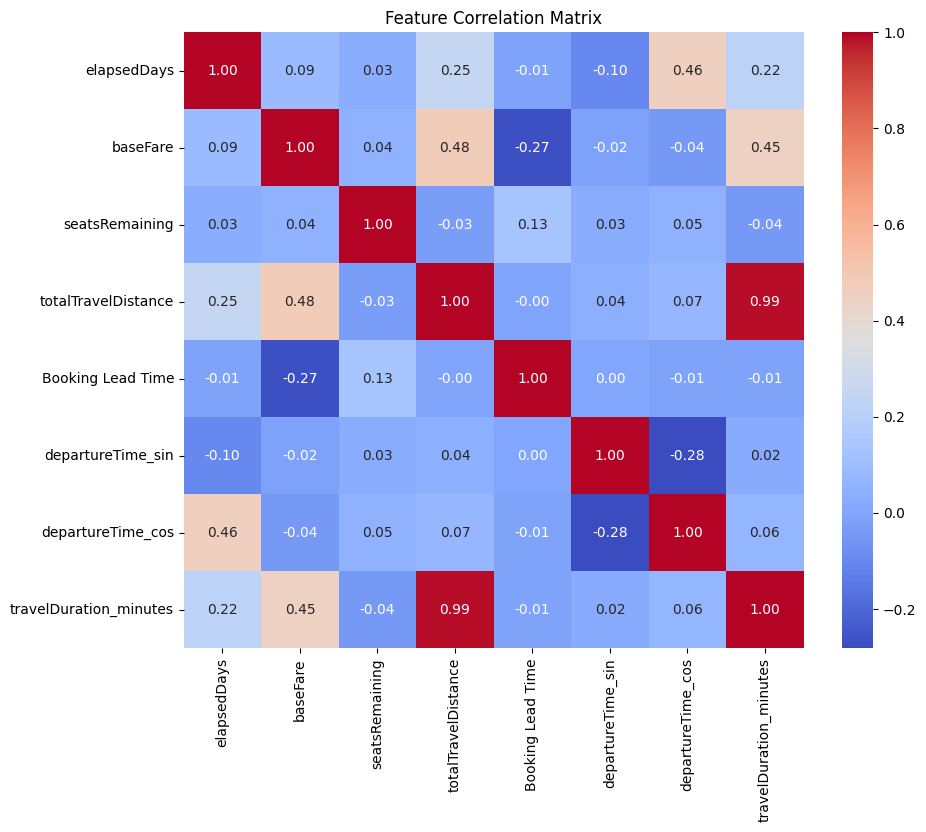

In [148]:
numeric_df = df_nonstop_flights.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

The analysis of the heatmap reveals several key relationships between the features:

* **High Multicollinearity:** There is an extremely high positive correlation (**0.99**) between `totalTravelDistance` and `travelDuration_minutes`. These two features are nearly identical and provide redundant information. Therefore, `totalTravelDistance` will be dropped, since there are 5317 NaN values which is not the case for `travelDuration_minutes`.
* **Moderate Correlations:** `baseFare`, which is our target variable, shows a moderate positive correlation with `totalTravelDistance` (0.48) and `travelDuration_minutes` (0.45). This is intuitive: longer flights (in time or distance) tend to cost more.
* **Weak Correlations:** `Booking Lead Time` has a weak negative correlation with `baseFare` (-0.27), suggesting that booking further in advance is associated with slightly lower fares. `seatsRemaining` shows almost no linear relationship with the other features.

In [149]:
df_nonstop_flights = df_nonstop_flights.drop(columns=['totalTravelDistance'])

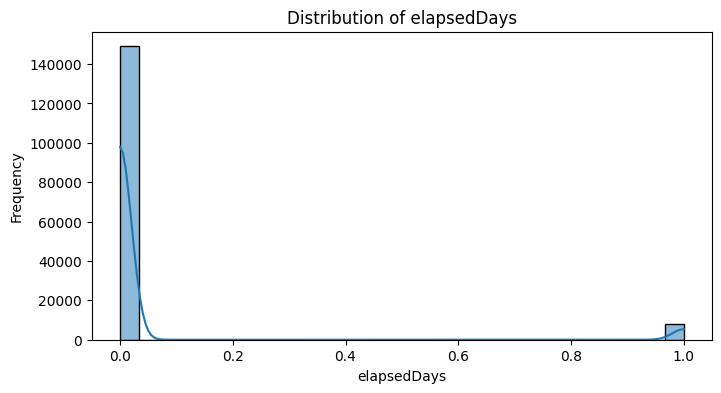

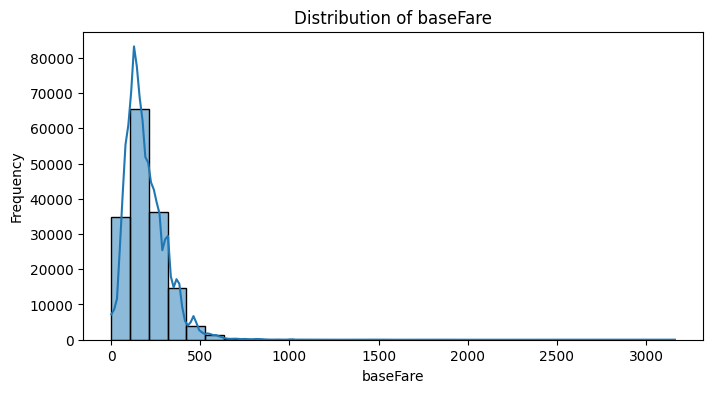

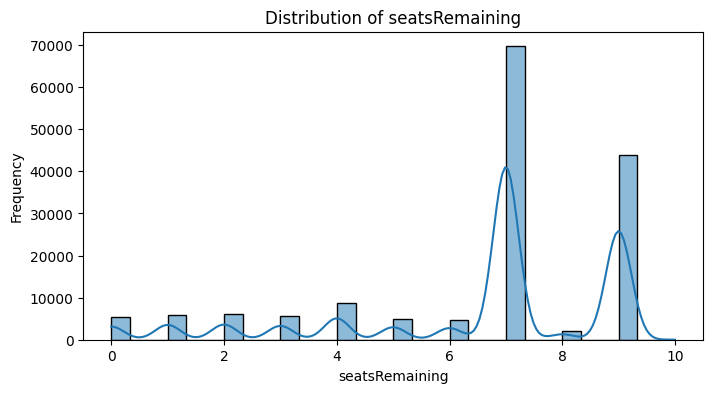

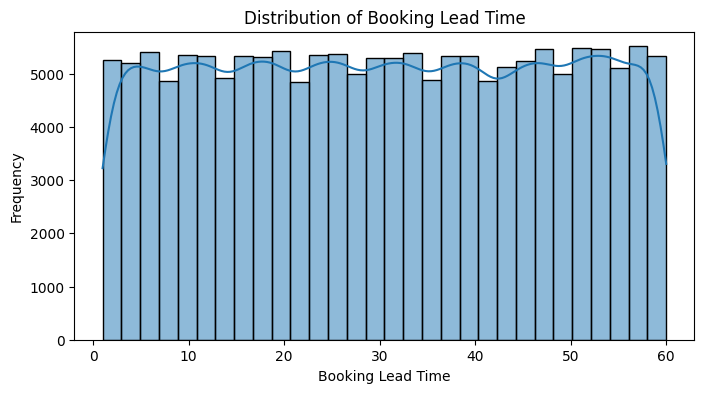

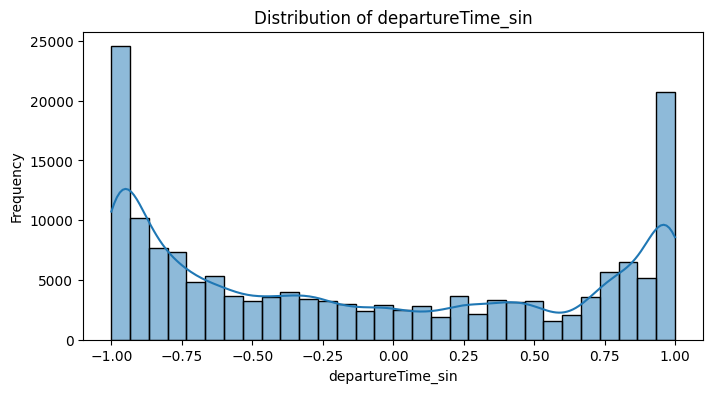

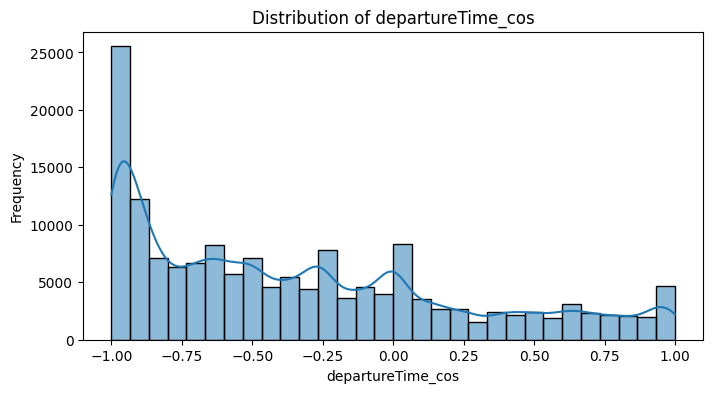

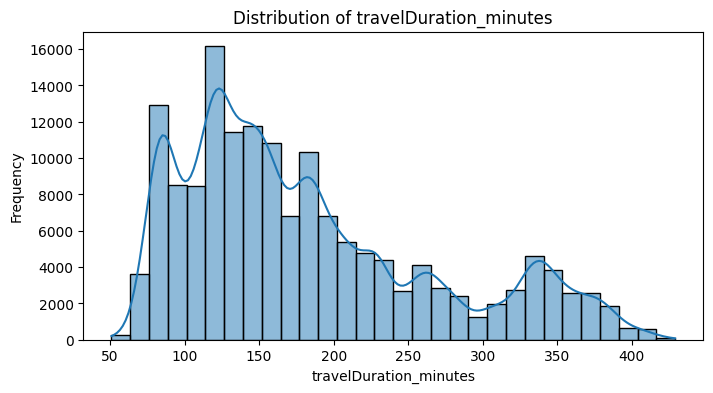

In [150]:
numeric_df = df_nonstop_flights.select_dtypes(include=['float64', 'int64'])

for column in numeric_df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_nonstop_flights[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [151]:
skewness_values = numeric_df.skew()
print("Skewness of Numeric Features:")
print(skewness_values)

Skewness of Numeric Features:
elapsedDays               4.046224
baseFare                  2.664254
seatsRemaining           -1.151732
Booking Lead Time        -0.003696
departureTime_sin         0.240241
departureTime_cos         0.715679
travelDuration_minutes    0.885847
dtype: float64


**Distribution Analysis & Verification**

**Visual Inspection (Histograms)**
The histograms plotted in the cell above provide an initial visual assessment of the numeric features. They suggest that `baseFare`, `totalTravelDistance`, and `seatsRemaining` do not follow a normal distribution and appear to be skewed.

**Quantitative Verification (Skewness)**
To statistically validate this observation, we calculated the skewness coefficients.

**Skewness Coefficients:**
* `elapsedDays`: 4.05 (Highly right-skewed)
* `baseFare`: 2.66 (Highly right-skewed)
* `seatsRemaining`: -1.15 (Highly left-skewed)
* `totalTravelDistance`: 0.83 (Moderately right-skewed)
* `Days Booked Before Flight`: -0.00 (Symmetric)

**Conclusion:**
The calculations confirm our visual hypothesis. We define features with an absolute skewness > 0.5 as skewed.

* **Right-Skewed:** `baseFare`, `elapsedDays`, and `totalTravelDistance`.
* **Left-Skewed:** `seatsRemaining`.
* **Symmetric:** `Days Booked Before Flight`.

**Implication and Next Steps**
Linear models (like Linear Regression) perform best when features and (especially) the target variable are symmetrically distributed. The high skewness of our target (`baseFare`) and key predictors (`totalTravelDistance`) can violate model assumptions and give disproportionate weight to extreme values (outliers).

**Action:** We will apply a **log-transformation** (specifically `np.log1p` to handle zero values) to the **right-skewed** target variable `baseFare` at the end of this notebook to not interfere with any of the following analysis. Since log-transformation is a deterministic mathematical function (not a trainable transformation like scaling), it can be safely applied before the train-test split without risk of data leakage. This transformation will compress the long right tail and make the data more "normal," leading to a more stable and accurate model.

**Categorical Feature Handling**

At this point, all numeric features have been cleaned. We now need to process the remaining non-numeric features so they can be used by the model:
- `isBasicEconomy` (Boolean → Integer)
- `startingAirport` (Categorical → One-Hot)
- `destinationAirport` (Categorical → One-Hot)
- `segmentsAirlineName` (Categorical → One-Hot)
- `dayOfWeek` (Categorical → One-Hot)

In [152]:
df_nonstop_flights['isBasicEconomy'] = df_nonstop_flights['isBasicEconomy'].astype(int)

print("Data types after boolean conversion:")
print(df_nonstop_flights.dtypes)
df_nonstop_flights.head()

Data types after boolean conversion:
startingAirport            object
destinationAirport         object
elapsedDays                 int64
isBasicEconomy              int64
baseFare                  float64
seatsRemaining              int64
segmentsAirlineName        object
Booking Lead Time           int64
dayOfWeek                  object
departureTime_sin         float64
departureTime_cos         float64
travelDuration_minutes    float64
dtype: object


,startingAirport,destinationAirport,elapsedDays,isBasicEconomy,baseFare,seatsRemaining,segmentsAirlineName,Booking Lead Time,dayOfWeek,departureTime_sin,departureTime_cos,travelDuration_minutes
0,ATL,BOS,0,0,450.23,9,Delta,1,Sunday,0.402747,-0.915311,155.0
1,ATL,BOS,0,0,450.23,9,Delta,1,Sunday,0.087156,-0.996195,155.0
2,ATL,BOS,0,0,450.23,9,Delta,1,Sunday,-0.442289,-0.896873,155.0
3,ATL,BOS,0,0,450.23,7,Delta,1,Sunday,0.831470,-0.555570,157.0
4,ATL,BOS,0,0,450.23,9,Delta,1,Sunday,-0.246153,-0.969231,158.0


In [153]:
print(f"Unique 'startingAirport' values: {df_nonstop_flights['startingAirport'].nunique()}")
print(f"Unique 'destinationAirport' values: {df_nonstop_flights['destinationAirport'].nunique()}")
print(f"Unique Airlines: {df_nonstop_flights['segmentsAirlineName'].nunique()}")

print("Top 10 Starting Airports:")
print(df_nonstop_flights['startingAirport'].value_counts().head(10))

Unique 'startingAirport' values: 16
Unique 'destinationAirport' values: 16
Unique Airlines: 7
Top 10 Starting Airports:
startingAirport
BOS    14827
ORD    14692
LAX    13560
LGA    13198
ATL    12293
JFK    12192
DFW    11649
EWR     9716
SFO     9624
MIA     9464
Name: count, dtype: int64


**One-Hot Encoding**

The cardinality check shows a low number of unique values for categorical features:
- 16 unique airports (starting and destination)
- 7 days of the week
- Multiple airlines

One-Hot Encoding will be applied to: `startingAirport`, `destinationAirport`, `segmentsAirlineName`, and `dayOfWeek`.

We use `drop_first=True` to prevent multicollinearity by removing one category per feature as a reference.

In [154]:
df_processed = pd.get_dummies(df_nonstop_flights, 
                              columns=['startingAirport', 'destinationAirport', 'segmentsAirlineName', 'dayOfWeek'], 
                              drop_first=True)

print(f"Original shape: {df_nonstop_flights.shape}")
print(f"New shape after OHE: {df_processed.shape}")
print("DataFrame with new encoded columns:")
df_processed.head()

Original shape: (157086, 12)
New shape after OHE: (157086, 50)
DataFrame with new encoded columns:


,elapsedDays,isBasicEconomy,baseFare,seatsRemaining,Booking Lead Time,departureTime_sin,departureTime_cos,travelDuration_minutes,startingAirport_BOS,startingAirport_CLT,...,segmentsAirlineName_Frontier Airlines,segmentsAirlineName_JetBlue Airways,segmentsAirlineName_Spirit Airlines,segmentsAirlineName_United,dayOfWeek_Monday,dayOfWeek_Saturday,dayOfWeek_Sunday,dayOfWeek_Thursday,dayOfWeek_Tuesday,dayOfWeek_Wednesday
0,0,0,450.23,9,1,0.402747,-0.915311,155.0,False,False,...,False,False,False,False,False,False,True,False,False,False
1,0,0,450.23,9,1,0.087156,-0.996195,155.0,False,False,...,False,False,False,False,False,False,True,False,False,False
2,0,0,450.23,9,1,-0.442289,-0.896873,155.0,False,False,...,False,False,False,False,False,False,True,False,False,False
3,0,0,450.23,7,1,0.831470,-0.555570,157.0,False,False,...,False,False,False,False,False,False,True,False,False,False
4,0,0,450.23,9,1,-0.246153,-0.969231,158.0,False,False,...,False,False,False,False,False,False,True,False,False,False


In [155]:
bool_cols = df_processed.select_dtypes(include='bool').columns
df_processed[bool_cols] = df_processed[bool_cols].astype(int)
df_processed.head()

,elapsedDays,isBasicEconomy,baseFare,seatsRemaining,Booking Lead Time,departureTime_sin,departureTime_cos,travelDuration_minutes,startingAirport_BOS,startingAirport_CLT,...,segmentsAirlineName_Frontier Airlines,segmentsAirlineName_JetBlue Airways,segmentsAirlineName_Spirit Airlines,segmentsAirlineName_United,dayOfWeek_Monday,dayOfWeek_Saturday,dayOfWeek_Sunday,dayOfWeek_Thursday,dayOfWeek_Tuesday,dayOfWeek_Wednesday
0,0,0,450.23,9,1,0.402747,-0.915311,155.0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,450.23,9,1,0.087156,-0.996195,155.0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,450.23,9,1,-0.442289,-0.896873,155.0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,450.23,7,1,0.831470,-0.555570,157.0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,450.23,9,1,-0.246153,-0.969231,158.0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [156]:
df_processed.columns

Index(['elapsedDays', 'isBasicEconomy', 'baseFare', 'seatsRemaining',
       'Booking Lead Time', 'departureTime_sin', 'departureTime_cos',
       'travelDuration_minutes', 'startingAirport_BOS', 'startingAirport_CLT',
       'startingAirport_DEN', 'startingAirport_DFW', 'startingAirport_DTW',
       'startingAirport_EWR', 'startingAirport_IAD', 'startingAirport_JFK',
       'startingAirport_LAX', 'startingAirport_LGA', 'startingAirport_MIA',
       'startingAirport_OAK', 'startingAirport_ORD', 'startingAirport_PHL',
       'startingAirport_SFO', 'destinationAirport_BOS',
       'destinationAirport_CLT', 'destinationAirport_DEN',
       'destinationAirport_DFW', 'destinationAirport_DTW',
       'destinationAirport_EWR', 'destinationAirport_IAD',
       'destinationAirport_JFK', 'destinationAirport_LAX',
       'destinationAirport_LGA', 'destinationAirport_MIA',
       'destinationAirport_OAK', 'destinationAirport_ORD',
       'destinationAirport_PHL', 'destinationAirport_SFO',
       '

The histograms above provide insights into the distribution of each numeric feature. Skewed distributions may require transformation (e.g., log transformation) to normalize the data.

**Distribution of Flight Prices & Range Analysis**

To determine the appropriate train-test split strategy, we need to analyze the distribution and range of our target variable `baseFare`.

In [157]:
max_fare = df_nonstop_flights['baseFare'].max()
total_rows = len(df_nonstop_flights)
intervals = [0, 25, 250]

current = 500
while current <= max_fare + 250:
    intervals.append(current)
    current += 250


cumulative_count = 0

for i in range(len(intervals) - 1):
    lower = intervals[i]
    upper = intervals[i + 1]
    count = ((df_nonstop_flights['baseFare'] >= lower) & 
             (df_nonstop_flights['baseFare'] < upper)).sum()
    
    percentage = (count / total_rows) * 100
    cumulative_count += count
    cumulative_percentage = (cumulative_count / total_rows) * 100

    if i == 0:
        print(f"${lower:4.0f} - ${upper:4.0f}    {count:10,}     {percentage:6.2f}%      {cumulative_percentage:8.2f}%")
    else:
        print(f"${lower:4.0f} - ${upper:4d}    {count:10,}     {percentage:6.2f}%      {cumulative_percentage:8.2f}%")
    
    if cumulative_percentage >= 99.9:
        if cumulative_count < total_rows:
            remaining = total_rows - cumulative_count
            remaining_pct = (remaining / total_rows) * 100
            print(f"${upper:4d}+          {remaining:10,}     {remaining_pct:6.2f}%      {100.0:8.2f}%")
        break

$   0 - $  25         2,218       1.41%          1.41%
$  25 - $ 250       113,695      72.38%         73.79%
$ 250 - $ 500        38,783      24.69%         98.48%
$ 500 - $ 750         2,038       1.30%         99.78%
$ 750 - $1000           209       0.13%         99.91%
$1000+                 143       0.09%        100.00%


**IQR Analysis**: Identify data between Q1 and Q3

In [158]:
Q1 = df_processed['baseFare'].quantile(0.25)
Q3 = df_processed['baseFare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\nIQR Statistics:")
print(f"   Q1 (25th percentile):     ${Q1:.2f}")
print(f"   Q3 (75th percentile):     ${Q3:.2f}")
print(f"   IQR (Q3 - Q1):            ${IQR:.2f}")
print(f"   Lower Bound (Q1-1.5*IQR): ${lower_bound:.2f}")
print(f"   Upper Bound (Q3+1.5*IQR): ${upper_bound:.2f}")

below_lower = (df_processed['baseFare'] < lower_bound).sum()
above_upper = (df_processed['baseFare'] > upper_bound).sum()
within_bounds = ((df_processed['baseFare'] >= lower_bound) & 
                 (df_processed['baseFare'] <= upper_bound)).sum()
total_outliers = below_lower + above_upper
total_rows = len(df_processed)

print(f"\n{'Outlier Category':<25} {'Price Range':<30} {'Count':>10} {'Percentage':>12}")
print(f"{'Below Lower Bound':<25} {'< $' + f'{lower_bound:.2f}':<30} {below_lower:>10,} {below_lower/total_rows*100:>11.2f}%")
print(f"{'Within Bounds':<25} {'$' + f'{lower_bound:.2f} - ${upper_bound:.2f}':<30} {within_bounds:>10,} {within_bounds/total_rows*100:>11.2f}%")
print(f"{'Above Upper Bound':<25} {'> $' + f'{upper_bound:.2f}':<30} {above_upper:>10,} {above_upper/total_rows*100:>11.2f}%")
print(f"{'Total Outliers':<25} {'-':<30} {total_outliers:>10,} {total_outliers/total_rows*100:>11.2f}%")


IQR Statistics:
   Q1 (25th percentile):     $117.21
   Q3 (75th percentile):     $254.88
   IQR (Q3 - Q1):            $137.67
   Lower Bound (Q1-1.5*IQR): $-89.30
   Upper Bound (Q3+1.5*IQR): $461.38

Outlier Category          Price Range                         Count   Percentage
Below Lower Bound         < $-89.30                               0        0.00%
Within Bounds             $-89.30 - $461.38                 153,129       97.48%
Above Upper Bound         > $461.38                           3,957        2.52%
Total Outliers            -                                   3,957        2.52%


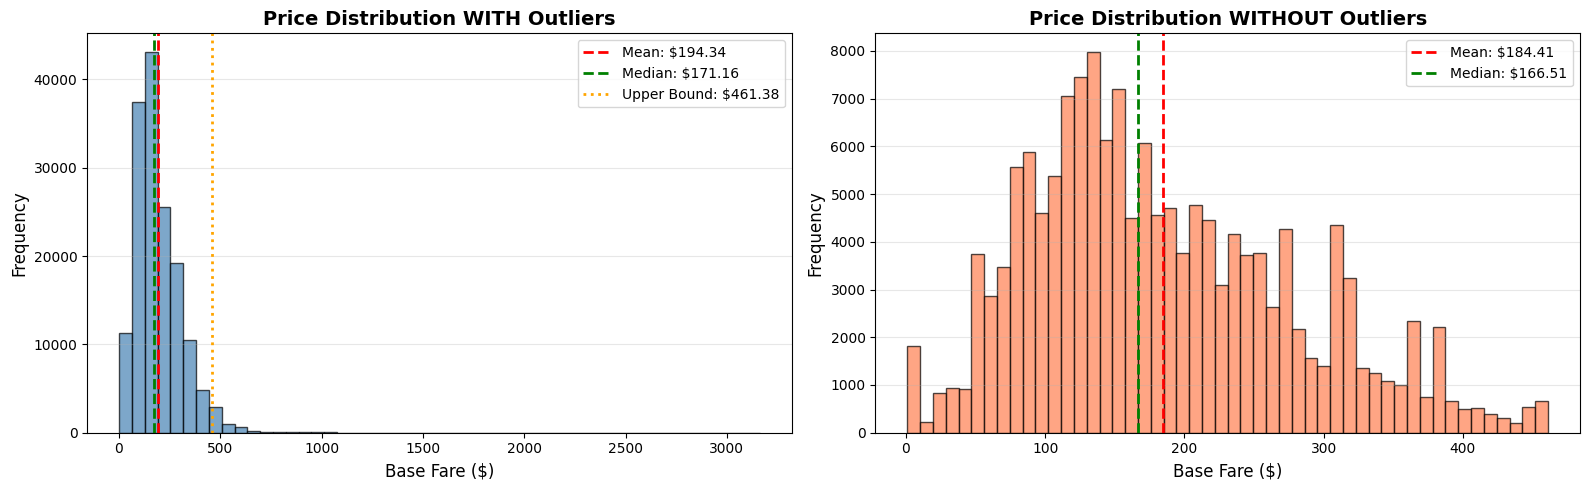

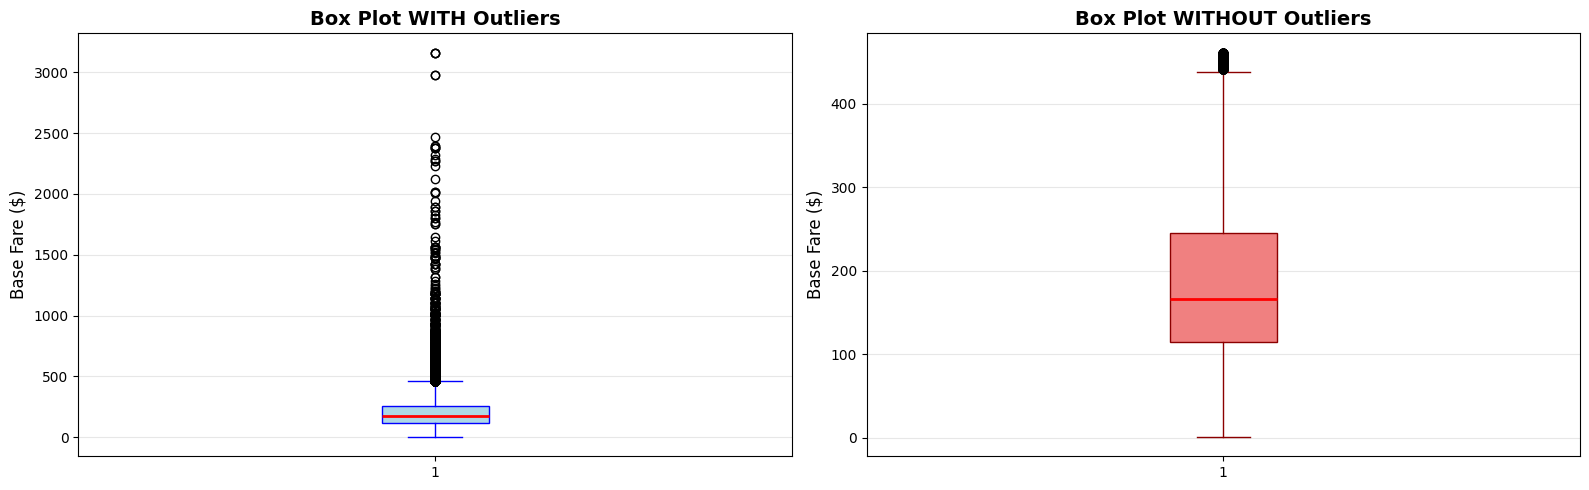

In [159]:
df_without_outliers = df_processed[(df_processed['baseFare'] >= lower_bound) & 
                                    (df_processed['baseFare'] <= upper_bound)]

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

axes[0].hist(df_processed['baseFare'], bins=50, color='steelblue', alpha=0.7, edgecolor='black')
axes[0].axvline(df_processed['baseFare'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: ${df_processed["baseFare"].mean():.2f}')
axes[0].axvline(df_processed['baseFare'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: ${df_processed["baseFare"].median():.2f}')
axes[0].axvline(upper_bound, color='orange', linestyle=':', linewidth=2, label=f'Upper Bound: ${upper_bound:.2f}')
axes[0].set_xlabel('Base Fare ($)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Price Distribution WITH Outliers', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

axes[1].hist(df_without_outliers['baseFare'], bins=50, color='coral', alpha=0.7, edgecolor='black')
axes[1].axvline(df_without_outliers['baseFare'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: ${df_without_outliers["baseFare"].mean():.2f}')
axes[1].axvline(df_without_outliers['baseFare'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: ${df_without_outliers["baseFare"].median():.2f}')
axes[1].set_xlabel('Base Fare ($)', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Price Distribution WITHOUT Outliers', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

axes[0].boxplot(df_processed['baseFare'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightblue', color='blue'),
                medianprops=dict(color='red', linewidth=2),
                whiskerprops=dict(color='blue'),
                capprops=dict(color='blue'))
axes[0].set_ylabel('Base Fare ($)', fontsize=12)
axes[0].set_title('Box Plot WITH Outliers', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

axes[1].boxplot(df_without_outliers['baseFare'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightcoral', color='darkred'),
                medianprops=dict(color='red', linewidth=2),
                whiskerprops=dict(color='darkred'),
                capprops=dict(color='darkred'))
axes[1].set_ylabel('Base Fare ($)', fontsize=12)
axes[1].set_title('Box Plot WITHOUT Outliers', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

**Log Transformation**

In [ ]:
log_transformed_base_fare = np.log1p(df_processed["baseFare"])

df_processed["baseFare"] = log_transformed_base_fare

## Train-Test Split

Keep the outliers (not just IQR data) and split it into train and test datasets

In [161]:
X = df_processed.drop('baseFare', axis=1)
y = df_processed['baseFare']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

print(f"Dataset Sizes:")
print(f"   Total samples:           {len(df_processed):,}")
print(f"   Training samples:        {len(X_train):,} ({len(X_train)/len(df_processed)*100:.1f}%)")
print(f"   Test samples:            {len(X_test):,} ({len(X_test)/len(df_processed)*100:.1f}%)")
print(f"   Number of features:      {X_train.shape[1]}")

print(f"\nTarget Variable Distribution:")
print(f"{'Set':<15} {'Mean':<15} {'Median':<15} {'Std':<15} {'Min':<15} {'Max':<15}")
print(f"{'Training':<15} ${y_train.mean():<14.2f} ${y_train.median():<14.2f} ${y_train.std():<14.2f} ${y_train.min():<14.2f} ${y_train.max():<14.2f}")
print(f"{'Test':<15} ${y_test.mean():<14.2f} ${y_test.median():<14.2f} ${y_test.std():<14.2f} ${y_test.min():<14.2f} ${y_test.max():<14.2f}")
print(f"{'Full Dataset':<15} ${y.mean():<14.2f} ${y.median():<14.2f} ${y.std():<14.2f} ${y.min():<14.2f} ${y.max():<14.2f}")

Dataset Sizes:
   Total samples:           157,086
   Training samples:        125,668 (80.0%)
   Test samples:            31,418 (20.0%)
   Number of features:      49

Target Variable Distribution:
Set             Mean            Median          Std             Min             Max            
Training        $5.09           $5.15           $0.68           $0.69           $8.06          
Test            $5.08           $5.14           $0.67           $0.69           $8.00          
Full Dataset    $5.09           $5.15           $0.68           $0.69           $8.06          


In [162]:
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

/var/folders/xx/91svtrtd3j1_21wxy_6kqf2m0000gn/T/ipykernel_54103/274540753.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 0].boxplot([y_train, y_test],


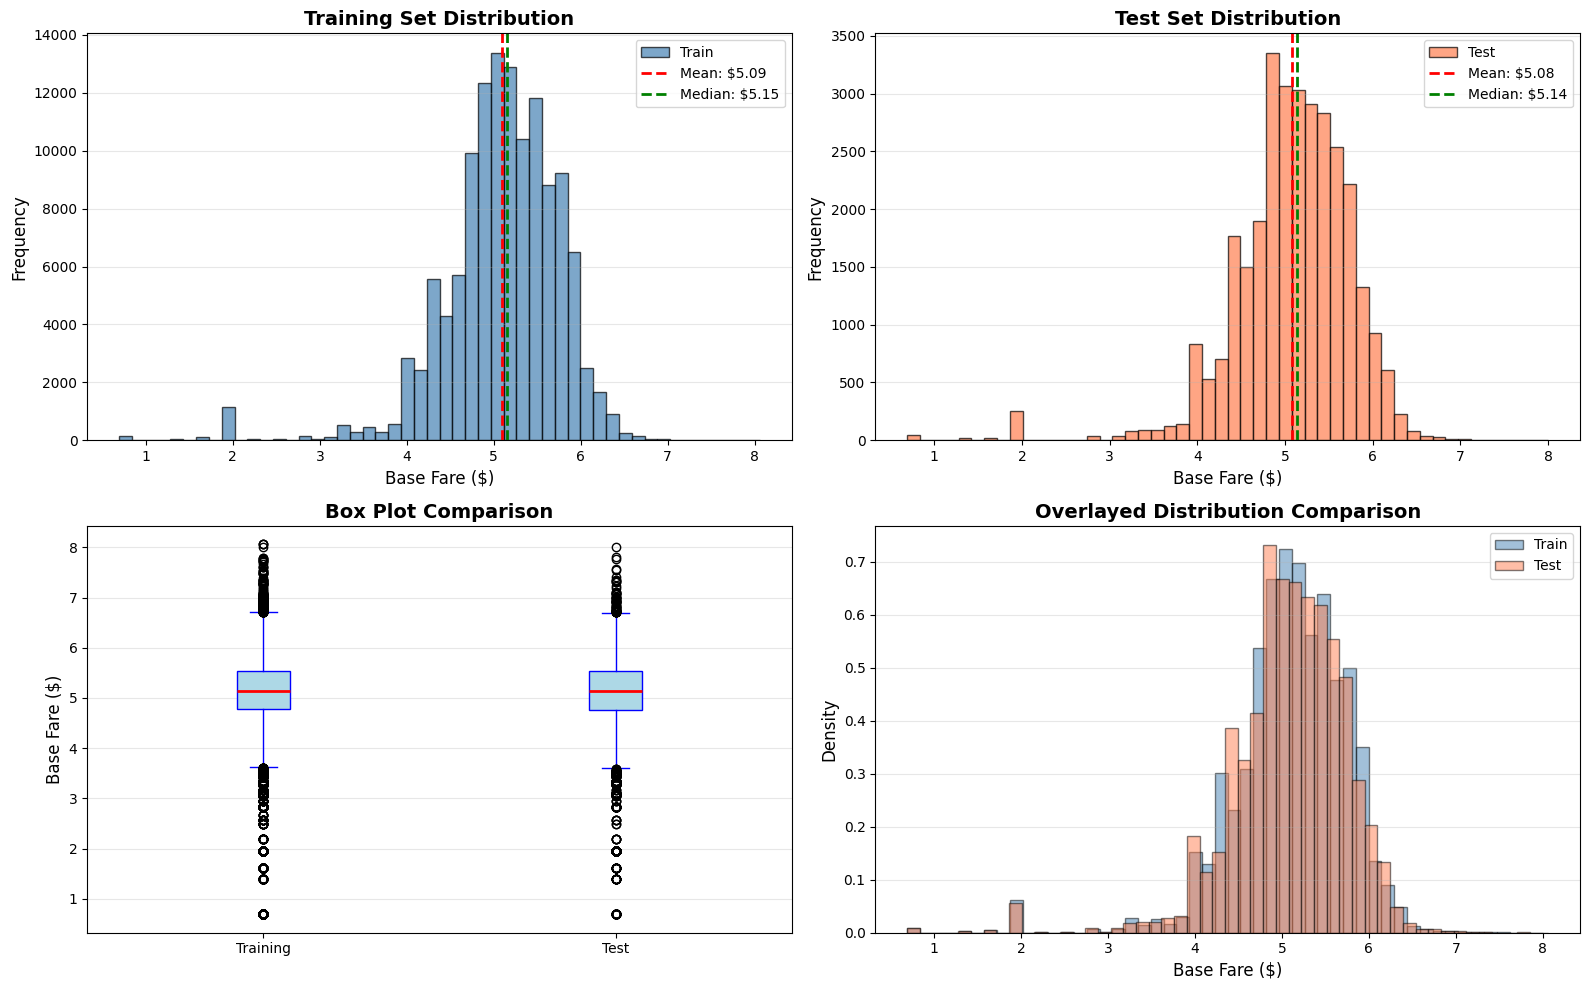

In [163]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

axes[0, 0].hist(y_train, bins=50, color='steelblue', alpha=0.7, edgecolor='black', label='Train')
axes[0, 0].axvline(y_train.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: ${y_train.mean():.2f}')
axes[0, 0].axvline(y_train.median(), color='green', linestyle='--', linewidth=2, label=f'Median: ${y_train.median():.2f}')
axes[0, 0].set_xlabel('Base Fare ($)', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].set_title('Training Set Distribution', fontsize=14, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)

axes[0, 1].hist(y_test, bins=50, color='coral', alpha=0.7, edgecolor='black', label='Test')
axes[0, 1].axvline(y_test.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: ${y_test.mean():.2f}')
axes[0, 1].axvline(y_test.median(), color='green', linestyle='--', linewidth=2, label=f'Median: ${y_test.median():.2f}')
axes[0, 1].set_xlabel('Base Fare ($)', fontsize=12)
axes[0, 1].set_ylabel('Frequency', fontsize=12)
axes[0, 1].set_title('Test Set Distribution', fontsize=14, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(axis='y', alpha=0.3)

axes[1, 0].boxplot([y_train, y_test], 
                    labels=['Training', 'Test'],
                    patch_artist=True,
                    boxprops=dict(facecolor='lightblue', color='blue'),
                    medianprops=dict(color='red', linewidth=2),
                    whiskerprops=dict(color='blue'),
                    capprops=dict(color='blue'))
axes[1, 0].set_ylabel('Base Fare ($)', fontsize=12)
axes[1, 0].set_title('Box Plot Comparison', fontsize=14, fontweight='bold')
axes[1, 0].grid(axis='y', alpha=0.3)

axes[1, 1].hist(y_train, bins=50, alpha=0.5, color='steelblue', label='Train', density=True, edgecolor='black')
axes[1, 1].hist(y_test, bins=50, alpha=0.5, color='coral', label='Test', density=True, edgecolor='black')
axes[1, 1].set_xlabel('Base Fare ($)', fontsize=12)
axes[1, 1].set_ylabel('Density', fontsize=12)
axes[1, 1].set_title('Overlayed Distribution Comparison', fontsize=14, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

Additional Validity Check:
- Check if feature `travelDuration_minutes` has negative or equal to 0 values
- Check if feature `seatsRemaining` has negative values
- Check if feature `baseFare` has negative values

In [164]:
print((df_train['travelDuration_minutes'] <= 0).sum())
print((df_train['seatsRemaining'] < 0).sum())
print((df_train['baseFare'] <= 0).sum())

0
0
0


In [165]:
df_train.to_csv('data/train_data.csv', index=False)
df_test.to_csv('data/test_data.csv', index=False)

print(f"\nTotal data saved: {len(df_train) + len(df_test):,} rows in train and test CSV files.")


Total data saved: 157,086 rows in train and test CSV files.
